In [30]:
import nltk
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn.metrics
from pandas import DataFrame,Series
from sklearn.feature_extraction.text import TfidfVectorizer
from time import time
import matplotlib.pyplot as plt
import os
os.chdir(os.getcwd())

In [31]:
df=pd.read_csv('Desktop/DC/Top30.csv',sep=',')

In [32]:
df=df[:55000] # sliced the dataset. We will be using dataset from [0,55000)

In [33]:
df.head(10)

,Unnamed: 0,Unnamed: 0.1,Query,Description
0,10,10,Administrative Assistant,This Administrative Assistant position is resp...
1,35,35,Administrative Assistant,ADMINISTRATIVE ASSISTANT Part Time The West Or...
2,140,140,Administrative Assistant,Administrative Assistant - In Bus 26yrs Fashi...
3,214,214,Sales Representative,Are you ready for something new? Are you tired...
4,350,350,Customer Service Representative,Superior Staff Resources is currently seeking ...
5,375,375,Customer Service Representative,<br />\r<span><strong>The Opportunity:</strong...
6,388,388,Java Developer,<P><STRONG>As a member of the Web and Portal D...
7,395,395,Java Developer,<BR>\r<TABLE border=0 cellSpacing=0 cellPaddin...
8,618,618,Administrative Assistant,The main function of this role is to provide a...
9,650,650,Financial Analyst,Financial Analyst\n Perform portfolio analysis...


In [34]:
df.tail(10)

,Unnamed: 0,Unnamed: 0.1,Query,Description
54990,802846,802846,Jani-King Franchise Business Opportunity,<p>Looking to generate extra income and achiev...
54991,802847,802847,Jani-King Franchise Business Opportunity,<p>Looking to generate extra income and achiev...
54992,802848,802848,Jani-King Franchise Business Opportunity,<p>Looking to generate extra income and achiev...
54993,802849,802849,Jani-King Franchise Business Opportunity,<p>Looking to generate extra income and achiev...
54994,802850,802850,Jani-King Franchise Business Opportunity,<p>Looking to generate extra income and achiev...
54995,802851,802851,Jani-King Franchise Business Opportunity,<p>Looking to generate extra income and achiev...
54996,802852,802852,Jani-King Franchise Business Opportunity,<p>Looking to generate extra income and achiev...
54997,802853,802853,Jani-King Franchise Business Opportunity,<p>Looking to generate extra income and achiev...
54998,802854,802854,Jani-King Franchise Business Opportunity,<p>Looking to generate extra income and achiev...
54999,802855,802855,Jani-King Franchise Business Opportunity,<p>Looking to generate extra income and achiev...


In [35]:
print("The data-set has %d rows and %d columns"%(df.shape[0],df.shape[1]))

The data-set has 55000 rows and 4 columns


In [36]:
# Finding Missing Values (if any exists)
print(df.columns) 

for col_name in df.columns:
    print (col_name,end=": ")
    print (sum(df[col_name].isnull()))

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Query', 'Description'], dtype='object')
Unnamed: 0: 0
Unnamed: 0.1: 0
Query: 0
Description: 0


In [37]:
# no missing value found in any column

In [38]:
jobs_df=pd.read_csv('Desktop/DC/Top30.csv',index_col=False,na_values='',na_filter=True,usecols=['Query', 'Description'])
#dropped the unnecessary columns
jobs_df=jobs_df[:55000]

In [39]:
jobs_df.head()

,Query,Description
0,Administrative Assistant,This Administrative Assistant position is resp...
1,Administrative Assistant,ADMINISTRATIVE ASSISTANT Part Time The West Or...
2,Administrative Assistant,Administrative Assistant - In Bus 26yrs Fashi...
3,Sales Representative,Are you ready for something new? Are you tired...
4,Customer Service Representative,Superior Staff Resources is currently seeking ...


In [44]:
jobs_df.describe(include='all')

,Query,Description
count,55000,55000
unique,30,23583
top,Own Your Own Franchise!,<p>Compared to other franchise opportunities i...
freq,3701,3701


In [45]:
# So 30 different classes are present in the dataset

In [46]:
sum(jobs_df.duplicated()) #31400 rows are duplicate

31400

In [47]:
jobs_df.ix[jobs_df.duplicated(subset="Description",keep='first')]
# subset implies which column to be taken as judging criteria for finding duplicates by default all
# keep -first,last,false  first occurence and then remove duplicates after that

C:\Users\Sagar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,Query,Description
33,Sales Representative,<center><strong>SALES REPRESENTATIVE</strong><...
87,Maintenance Technician,<DIV>\r<P><B>Summary</B> Performs the regular ...
324,Sales Representative / Account Manager / Cust...,<p>If you are a confident and highly motivated...
325,Sales Representative / Account Manager / Cust...,<p>If you are a confident and highly motivated...
326,Sales Representative / Account Manager / Cust...,<p>If you are a confident and highly motivated...
...,...,...
54995,Jani-King Franchise Business Opportunity,<p>Looking to generate extra income and achiev...
54996,Jani-King Franchise Business Opportunity,<p>Looking to generate extra income and achiev...
54997,Jani-King Franchise Business Opportunity,<p>Looking to generate extra income and achiev...
54998,Jani-King Franchise Business Opportunity,<p>Looking to generate extra income and achiev...


In [48]:
jobs_df2=jobs_df.drop_duplicates()

In [49]:
print(sum(jobs_df2.duplicated())) #now verifying whether there are still duplicate values in our dataframe or not
jobs_df2.shape # new shape after removing duplication

0


(23600, 2)

In [50]:
category_counter={x:0 for x in set(jobs_df2['Query'])}  # used 'set' as set doesn't store duplicate values hence only unique categories are stored

In [51]:
for each_cat in jobs_df2['Query']:
    category_counter[each_cat]+=1

In [52]:
print(category_counter)   # list of distinct categories in whole dataset
ylab=[]
for val in category_counter.values():
    ylab.append(val)
xlab=[]
for key in category_counter.keys():
    xlab.append(key)

{'Financial Analyst': 1241, 'Sales Representative / Account Manager /  Customer Service': 2, 'Restaurant Manager': 685, 'Customer Service Representative': 2516, 'Project Manager': 1971, 'Java Developer': 944, 'Physical Therapist': 581, 'Inside Sales Representative': 688, 'Cashier': 128, 'Store Manager': 761, 'Sales / Franchise': 12, 'Mobile Tool Sales / Franchise Distributor': 3, 'Own Your Own Franchise!': 1, 'Account Executive': 829, 'Customer Service - Sales Representative - Part Time Work': 3, 'Staff Accountant': 2043, 'Benefits Consultant': 9, 'Executive Assistant': 1114, 'Business Analyst': 1460, 'Sales Representative': 1147, 'Receptionist': 1084, 'Sales Management Trainee': 52, 'Maintenance Technician': 1196, 'Senior Accountant': 1547, 'Retail Sales Associate': 426, 'Account Representative': 123, 'Administrative Assistant': 2998, 'Sales / Customer Service – Part or Full time – Summer Work': 2, 'Jani-King Franchise Business Opportunity': 10, 'Retail Wireless Sales Consultant': 24}

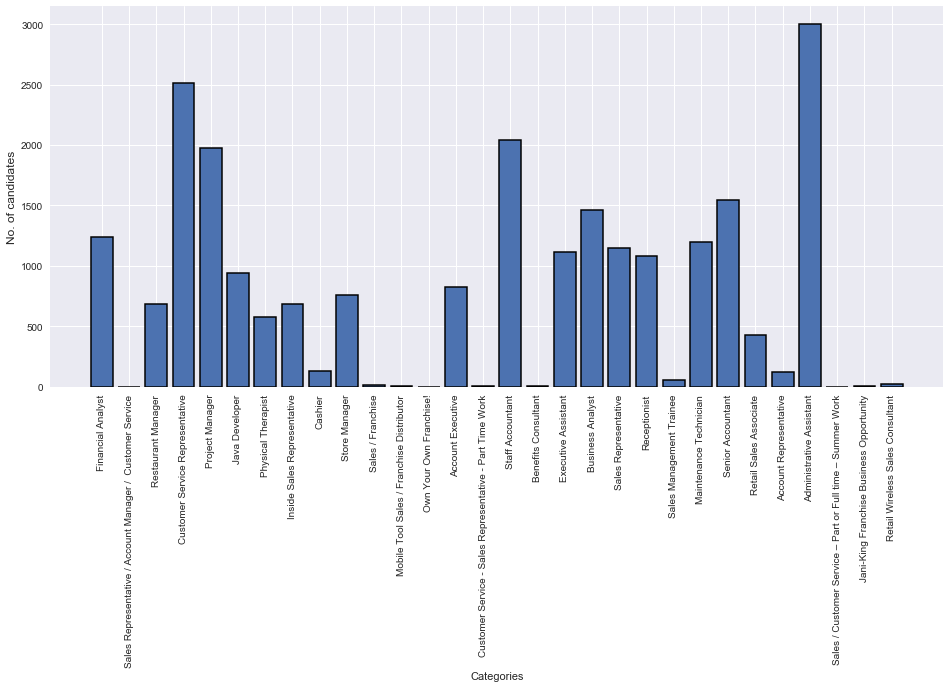

In [53]:
%matplotlib inline
plt.figure(figsize=(16,7))
plt.style.use("seaborn")
ypos=np.arange(len(xlab))
plt.xticks(ypos,xlab,rotation=90)
plt.xlabel('Categories')
plt.ylabel('No. of candidates',fontsize=12)
plt.bar(ypos,ylab,edgecolor='black',linewidth=1.5)
plt.show()

In [54]:
corpus=jobs_df2.Description

In [55]:
all_words=[w.split() for w in corpus]

all_flat_words=[ewords for words in all_words for ewords in words]

from nltk.corpus import stopwords

all_flat_words_ns=[w for w in all_flat_words if w not in stopwords.words("english")]
#removing all the stop words from the corpus

set_nf=set(all_flat_words_ns)

In [56]:
print("Number of unique vocabulary words in the Description column of the dataframe: %d"%len(set_nf))

Number of unique vocabulary words in the Description column of the dataframe: 272143


In [57]:
porter=nltk.PorterStemmer()
for each_row in jobs_df2.itertuples():
    m1=map(lambda x: x,(each_row[1]+' '+each_row[2]).lower().split())
    #for each row, it gets title and job description, concatenates them and converts them to lower case.
    m2=map(lambda x: porter.stem(x),m1)
    #Using Porter Stemmer in NLTK, stemming is performed on the str created in previous step.
    jobs_df2.loc[each_row[0],'query_desc']=' '.join(m2)
    #a derived column is created and the pre-processed string is stored in that column for each row.

C:\Users\Sagar\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Sagar\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\Sagar\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.py

In [58]:
#to confirm if we have successfully completed the transformation:
jobs_df2.head()
#it can be seen that a new column is created and filled with the stemmed words comprised of data concatenated from title and desc
#columns of the data frame. This newly created column will become our corpus for subsequent feature extraction process.

,Query,Description,query_desc
0,Administrative Assistant,This Administrative Assistant position is resp...,administr assist thi administr assist posit is...
1,Administrative Assistant,ADMINISTRATIVE ASSISTANT Part Time The West Or...,administr assist administr assist part time th...
2,Administrative Assistant,Administrative Assistant - In Bus 26yrs Fashi...,administr assist administr assist - in bu 26yr...
3,Sales Representative,Are you ready for something new? Are you tired...,sale repres are you readi for someth new? are ...
4,Customer Service Representative,Superior Staff Resources is currently seeking ...,custom servic repres superior staff resourc is...


In [59]:
corpus=jobs_df2.query_desc
vectorizer = TfidfVectorizer(stop_words='english')
#Initializing TFIDF vectorizer to convert the raw corpus to a matrix of TFIDF features and also enabling the removal of stopwords.
tfidf_matrix=vectorizer.fit_transform(corpus).todense()
#creating TFIDF features sparse matrix by fitting it on the specified corpus. 
tfidf_names=vectorizer.get_feature_names()
#grabbing the name of the features.

In [60]:
print("Number of TFIDF Features: %d"%len(tfidf_names))

Number of TFIDF Features: 42113


In [61]:
#which shows that there are 42113 columns that will be used for training the classifier. These are much smaller than the total
#number of unique vocabulary words that are there (272143) in the text description column alone.

In [62]:
training_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}
prediction_time_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}
accuracy_container={'b_naive_bayes':0,'mn_naive_bayes':0,'random_forest':0,'linear_svm':0}

In [63]:
variables=tfidf_matrix
#considering the TFIDF features as independent variables to be input to the classifier.
labels=jobs_df2.Query
#considering the category values as the class labels for the classifier.

variables_train,variables_test,labels_train,labels_test=train_test_split(variables,labels,test_size=.2)
#splitting the data into random training and test sets for both independent variables and labels.

In [64]:
#analyzing the shape of the training and test data-set:
print('Shape of Training Data: '+str(variables_train.shape))
print('Shape of Test Data: '+str(variables_test.shape))

Shape of Training Data: (18880, 42113)
Shape of Test Data: (4720, 42113)


In [65]:
#Applying Bernoulli Naive Bayes

In [66]:
training_time_container.keys()

dict_keys(['b_naive_bayes', 'mn_naive_bayes', 'random_forest', 'linear_svm'])

In [67]:
from sklearn.naive_bayes import BernoulliNB
#loading Gaussian Naive Bayes from the sklearn library
bnb_classifier=BernoulliNB()
#initializing the object
t0=time()
bnb_classifier=bnb_classifier.fit(variables_train,labels_train)
training_time_container['b_naive_bayes']=time()-t0
#fitting the classifier or training the classifier on the training data

In [68]:
#after the model has been trained, we proceed to test its performance on the test data:
t0=time()
bnb_predictions=bnb_classifier.predict(variables_test)
prediction_time_container['b_naive_bayes']=time()-t0

In [69]:
prediction_time_container['b_naive_bayes']

7.856662034988403

In [70]:
#the trained classifier has been used to make predictions on the test data-set. To evaluate the performance of the model,
#there are a number of metrics that can be used as follows:
nb_ascore=sklearn.metrics.accuracy_score(labels_test, bnb_predictions)
accuracy_container['b_naive_bayes']=nb_ascore

In [71]:
print("Bernoulli Naive Bayes Accuracy Score: %f"%accuracy_container['b_naive_bayes'])
print("Training Time: %f"%training_time_container['b_naive_bayes'])
print("Prediction Time: %f"%prediction_time_container['b_naive_bayes'])

Bernoulli Naive Bayes Accuracy Score: 0.718008
Training Time: 147.623469
Prediction Time: 7.856662


In [72]:
#it shows that the accuracy score of our model is 0.7237 or 72.37%. 
#Confusion Matrix is also another way to evaluate the prediction output of a classifier and also to determine the false positive
#and false negative, sensitivity, specificity, precision and recall metrics
print("Confusion Matrix of Bernoulli Naive Bayes Classifier output: ")
sklearn.metrics.confusion_matrix(labels_test,bnb_predictions)
#the values on the diagonal show correct predictions where as off-diagonal represent the records that have been misclassified.

Confusion Matrix of Bernoulli Naive Bayes Classifier output: 


array([[ 96,   0,  12,   0,   0,   0,   6,   0,   0,   0,   0,   0,   0,
         11,   0,   0,   0,   0,   0,   0,  27,   0,   0,   4,   0],
       [  1,   0,   0,   0,   0,   0,   8,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  14,   0,   0,   1,   0],
       [  1,   0, 595,   0,   1,   0,  11,  24,   0,   0,   1,   2,   0,
          1,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0],
       [  0,   0,  10,   0, 217,   0,   2,   0,  15,   0,   2,   0,   0,
         18,   0,   0,   0,   0,   0,   0,   1,   0,   3,  28,   0],
       [  0,   0,   4,   0,   0,   0,  17,   0,   0,   0,   0,   0,   0,
          1,   3,   1,   0,   0,   0,   0,   0,   0,   0,   6,   0],
       [  0,   0,  10,   0,   0,   0, 424,   0,   0,   0,   0,   0,   0,
          2,   1,   0,   0,   0,   0,   0,   2,   0,   0,   2,  46],
      

In [73]:
# Multinomial Naive Bayes

In [74]:
from sklearn.naive_bayes import MultinomialNB
mn_bayes=MultinomialNB()
t0=time()
mn_bayes_fit=mn_bayes.fit(variables_train,labels_train)
training_time_container['mn_naive_bayes']=time()-t0
t0=time()
prediction_mn=mn_bayes_fit.predict(variables_test)
prediction_time_container['mn_naive_bayes']=time()-t0
mn_ascore=sklearn.metrics.accuracy_score(labels_test, prediction_mn) 
accuracy_container['mn_naive_bayes']=mn_ascore

In [75]:
print("Accuracy Score of Multi-Nomial Naive Bayes: %f" %(mn_ascore))
print("Training Time: %fs"%training_time_container['mn_naive_bayes'])
print("Prediction Time: %fs"%prediction_time_container['mn_naive_bayes'])

Accuracy Score of Multi-Nomial Naive Bayes: 0.562712
Training Time: 36.050353s
Prediction Time: 17.513589s


In [76]:
# Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier=RandomForestClassifier(n_estimators=50)
t0=time()
rf_classifier=rf_classifier.fit(variables_train,labels_train)

training_time_container['random_forest']=time()-t0
print("Training Time: %fs"%training_time_container['random_forest'])

t0=time()
rf_predictions=rf_classifier.predict(variables_test)
prediction_time_container['random_forest']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['random_forest'])

accuracy_container['random_forest']=sklearn.metrics.accuracy_score(labels_test, rf_predictions)
print ("Accuracy Score of Random Forests Classifier: ")
print(accuracy_container['random_forest'])
print(sklearn.metrics.confusion_matrix(labels_test,rf_predictions))

Training Time: 142.895832s
Prediction Time: 2.929484s
Accuracy Score of Random Forests Classifier: 
0.9031779661016949
[[140   0   1   0   1   0   2   0   0   0   0   0   0   5   0   0   0   0
    0   0   7   0   0   0   0]
 [  0   8   0   0   0   0   9   0   0   1   0   0   0   0   0   0   0   0
    0   0   6   0   0   0   0]
 [  0   0 621   0   1   0   3   8   0   0   0   0   1   1   1   0   0   0
    0   0   0   0   0   1   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   1   0   0   0   0]
 [  0   0   2   0 259   0   3   0  22   0   3   0   0   6   0   0   0   0
    0   0   0   0   0   1   0]
 [  0   0   2   0   0  22   4   0   0   0   0   0   0   0   1   0   0   0
    0   0   0   0   0   3   0]
 [  0   0   2   0   0   0 480   0   0   0   0   3   0   1   0   0   0   0
    0   0   1   0   0   0   0]
 [  1   0 110   0   0   0   1 118   0   0   0   0   0   2   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   1   0   5   0   0   0 205   0

In [78]:
# Linear SVM using Stochastic Gradient Descent

In [79]:
from sklearn import linear_model

svm_classifier=linear_model.SGDClassifier(loss='hinge',alpha=0.0001)

t0=time()
svm_classifier=svm_classifier.fit(variables_train, labels_train)
training_time_container['linear_svm']=time()-t0
print("Training Time: %fs"%training_time_container['linear_svm'])

t0=time()
svm_predictions=svm_classifier.predict(variables_test)
prediction_time_container['linear_svm']=time()-t0
print("Prediction Time: %fs"%prediction_time_container['linear_svm'])

accuracy_container['linear_svm']=sklearn.metrics.accuracy_score(labels_test, svm_predictions)
print ("Accuracy Score of Linear SVM Classifier: %f"%accuracy_container['linear_svm'])
print(sklearn.metrics.confusion_matrix(labels_test,svm_predictions))

Training Time: 409.175857s
Prediction Time: 24.615827s
Accuracy Score of Linear SVM Classifier: 0.954873
[[141   0   0   0   1   0   3   0   0   0   0   0   0   1   0   1   0   0
    0   0   9   0   0   0   0]
 [  2   5   0   0   0   0   6   0   0   2   0   0   0   0   0   0   0   0
    0   0   8   0   0   1   0]
 [  0   0 622   0   0   0   2   9   0   0   0   0   0   0   3   0   0   0
    0   0   0   0   0   1   0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   1   0 279   0   2   0   8   0   2   0   0   2   0   0   0   0
    0   0   2   0   0   0   0]
 [  0   0   0   0   0  31   1   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 485   0   0   1   0   0   0   0   0   0   0   0
    0   0   0   0   0   1   0]
 [  0   0  26   0   0   0   1 203   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   1   0]
 [  0   0   0   0   2   0   1   0 221   0   0   0   0  

In [80]:
#if we train the SGD Classifier with elastic net penalty, it  brings more sparsity to the model not possible with the L2:
svm_classifier_enet=linear_model.SGDClassifier(loss='hinge',alpha=0.0001,penalty='elasticnet')
svm_classifier_enet=svm_classifier_enet.fit(variables_train, labels_train)

In [81]:
svm_enet_predictions=svm_classifier_enet.predict(variables_test)

In [82]:
print ("Accuracy Score of Linear SVM Classifier: %f"%sklearn.metrics.accuracy_score(labels_test,svm_enet_predictions))

Accuracy Score of Linear SVM Classifier: 0.957203


In [83]:
%matplotlib inline
ytrainlab=[]
for val in training_time_container.values():
    ytrainlab.append(val)
xtrainlab=[]
for key in training_time_container.keys():
    xtrainlab.append(key)

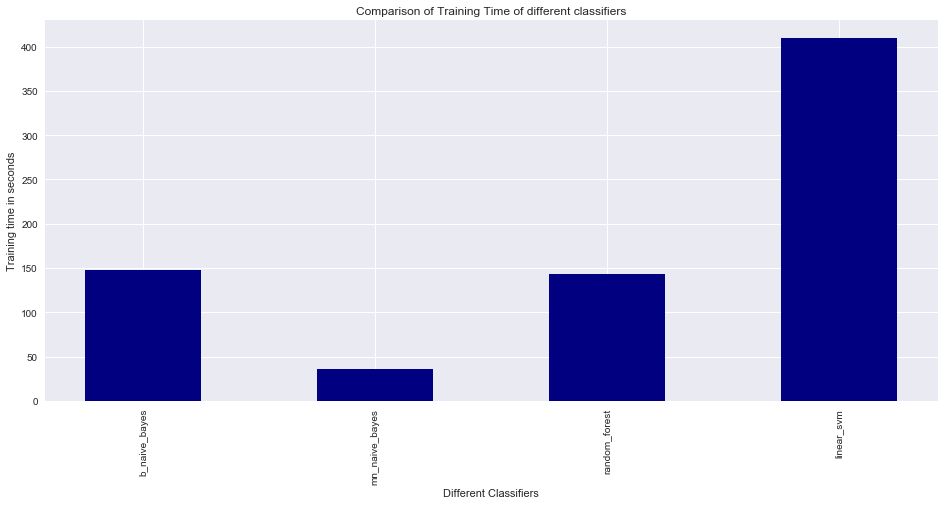

In [84]:
    plt.figure(figsize=(16,7))
    plt.style.use("seaborn")
    ytrainpos=np.arange(len(xtrainlab))
    plt.xticks(ytrainpos,xtrainlab,rotation=90)
    plt.ylabel("Training time in seconds")
    plt.xlabel("Different Classifiers")
    plt.title("Comparison of Training Time of different classifiers")
    plt.bar(ytrainpos,ytrainlab,width=0.5,color='navy')
    plt.show()

In [85]:
ypredlab=[]
for val in prediction_time_container.values():
    ypredlab.append(val)
xpredlab=[]
for key in prediction_time_container.keys():
    xpredlab.append(key)

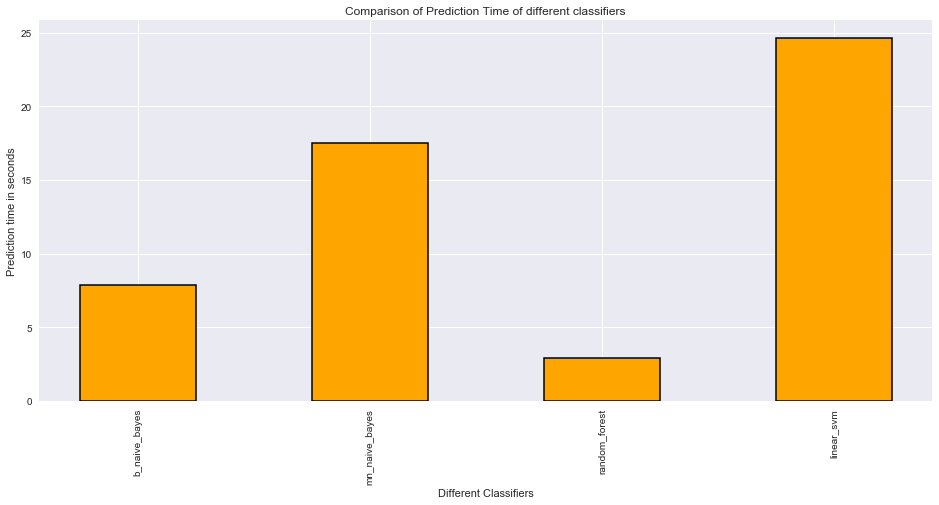

In [86]:
plt.figure(figsize=(16,7))
plt.style.use("seaborn")
ypredpos=np.arange(len(xpredlab))
plt.xticks(ypredpos,xpredlab,rotation=90)
plt.ylabel("Prediction time in seconds")
plt.title("Comparison of Prediction Time of different classifiers")
plt.bar(ypredpos,ypredlab,width=0.5,color="orange",edgecolor='black',linewidth=1.5)
plt.xlabel("Different Classifiers")
plt.show()

In [87]:
yacclab=[]
for val in accuracy_container.values():
    yacclab.append(val)
xacclab=[]
for key in accuracy_container.keys():
    xacclab.append(key)

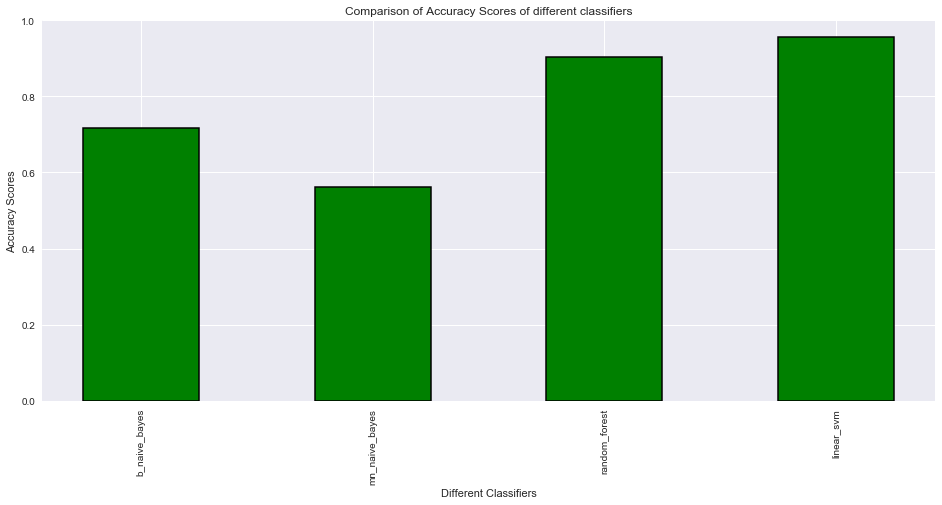

In [88]:
plt.figure(figsize=(16,7))
plt.style.use("seaborn")
yaccpos=np.arange(len(xacclab))
plt.xticks(yaccpos,xacclab,rotation=90)
plt.ylabel("Accuracy Scores")
plt.ylim(0,1.0)
plt.title("Comparison of Accuracy Scores of different classifiers")
plt.xlabel("Different Classifiers")
plt.bar(yaccpos,yacclab,width=0.5,color="green",edgecolor='black',linewidth=1.5)
plt.show()

In [89]:
# Applying Chi-Square Feature Selection
# currently we have used all the features from TFIDF matrix but we can reduce them using chi-square selection

In [90]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new=SelectKBest(chi2,k=5000).fit_transform(variables,labels)

In [91]:
#splititng the data into training and test data-set again:
cvariables_train,cvariables_test,clabels_train,clabels_test=train_test_split(X_new,labels,test_size=.2)

In [92]:
#now use these features to train the linear SVM Classifier and see what results do you get:
svm_classifier2=linear_model.SGDClassifier(alpha=0.0001,penalty='elasticnet',max_iter=50)
svm_classifier_f2=svm_classifier2.fit(cvariables_train, clabels_train)
predictions_svm2=svm_classifier_f2.predict(cvariables_test)

sklearn.metrics.confusion_matrix(clabels_test,predictions_svm2)

array([[173,   0,   0,   0,   0,   0,   1,   0,   1,   2,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   6,   0,   0,   0,   0],
       [  3,   4,   1,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0,   0],
       [  1,   0, 584,   0,   0,   0,   2,  16,   1,   1,   0,   0,   0,
          0,   2,   4,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 298,   0,   0,   0,  10,   0,   0,   0,   0,
          0,   3,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   2],
       [  0,   0,   0,   0,   0,  18,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0,   1,   0,   0,   0, 498,   0,   0,   2,   0,   0,   0,
          0,   0,   3,   1,   0,   0,   0,   

In [93]:
sklearn.metrics.accuracy_score(clabels_test,predictions_svm2)

0.9620762711864407